# Diff2GIF – Animated Diffusion Models
### Create your own animated network visualization by exploiting a diffusion model!
###### <b>Note</b>: consider using small networks (i.e. <= 300 nodes) to improve image readability 


In [585]:
# create network
import networkx as nx 

# visualization and i/o
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
%matplotlib inline
from matplotlib import cm
import imageio
import os

# network diffusion library
#!pip3 install ndlib
import ndlib.models.ModelConfig as mc 
import ndlib.models.epidemics as ep

In [586]:
# Network topology
g = nx.barabasi_albert_graph(100, 2)

In [587]:
# Model selection
model = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.4)
cfg.add_model_parameter("gamma", 0.1)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
n_iters = 20 # number of iterations
iterations = model.iteration_bunch(n_iters)


# print a node's possible states
model.available_statuses

{'Infected': 1, 'Removed': 2, 'Susceptible': 0}

In [588]:
# choose a color palette
cmap = cm.get_cmap('Set1')
colors = []
for i in range(cmap.N):
    rgb = cmap(i)
    colors.append(rgb)

In [589]:
# create a shortcut dict
status_dict = dict()
for status, code in model.available_statuses.items():
  status_dict[str(code)] = {
      'status': status,
      'color': colors[code]
  }

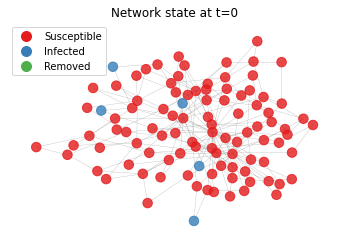

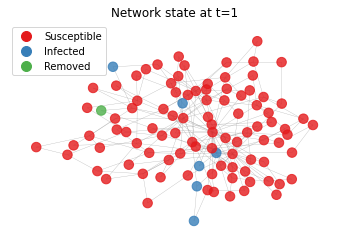

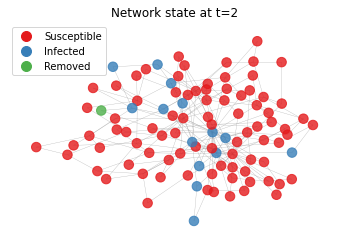

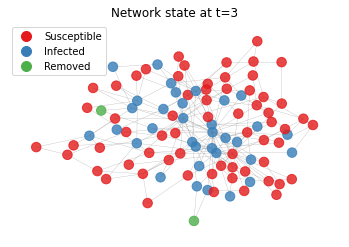

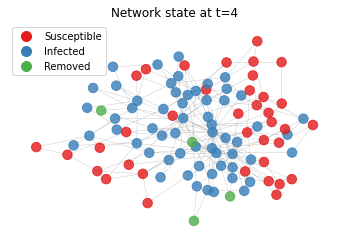

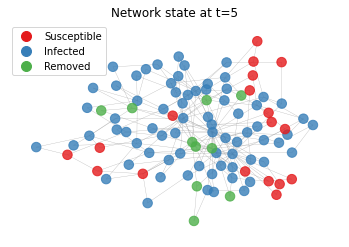

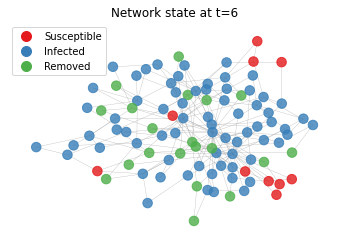

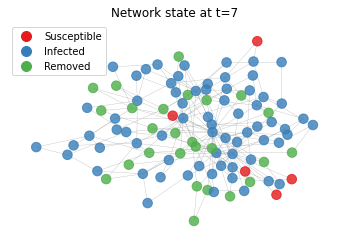

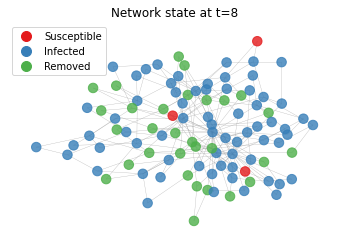

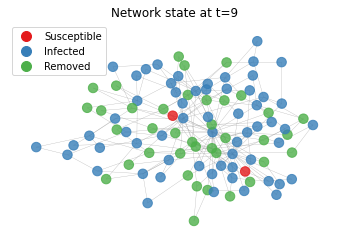

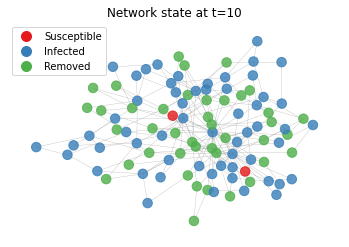

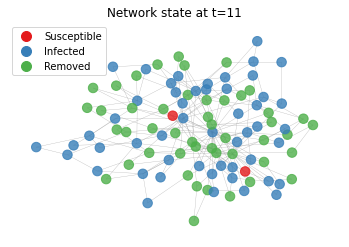

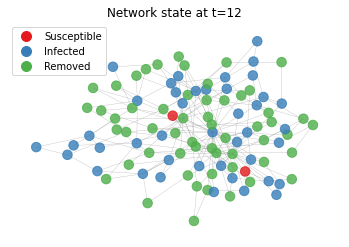

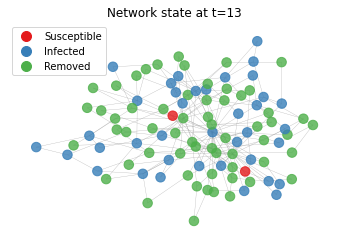

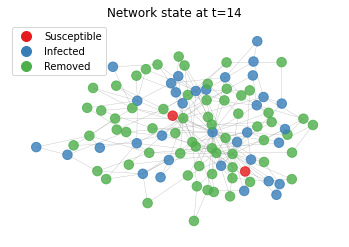

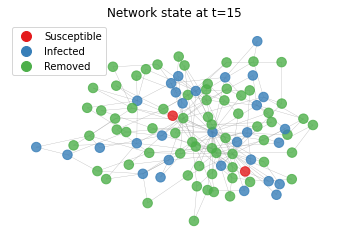

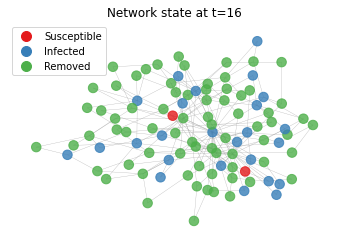

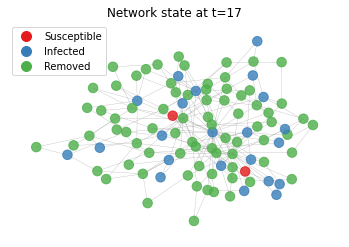

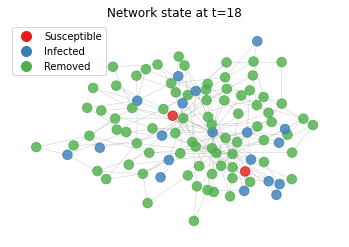

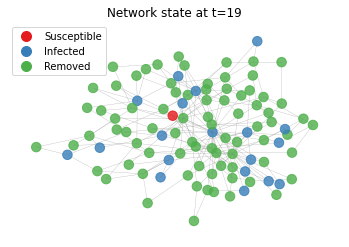

In [590]:
pos = nx.spring_layout(g) # fix node positions

for t, iter in enumerate(iterations):

  # assign status to each node
  status = iter['status']
  nx.set_node_attributes(g, status, name='status')
  

  # plot network
  plt.title(f'Network state at t={t}')
  nx.draw(g,
          pos=pos,
          alpha=.8,
          with_labels=False,
          edge_color=colors[cmap.N-1],
          width=.3, 
          node_color=[
                      status_dict[str(c['status'])]['color'] 
                      for n, c in g.nodes(data=True)
                      ],
          node_size=90
          )
  
  # plot legend
  handles = []
  for id, dic in status_dict.items():
    S=mlines.Line2D([], [], color=dic['color'],
                  marker='o',markersize=10,
                  linewidth=0,label=dic['status'])
    handles.append(S)
                
  plt.legend(handles=handles,loc=0)
  plt.savefig(f't{t}.png')
  plt.show()

In [591]:
def make_gif(name: str):
  """
  creates a gif by exploiting existing images,
  then removes them
  """
  # save gif
  filenames = ["t%s.png" % (i) for i in range(n_iters)]
  images = list(map(lambda filename: imageio.imread(filename), filenames))
  imageio.mimsave(name,images, duration=0.2)
  print('File saved:', name)

  # removes png files
  for filename in filenames:
    if os.path.isfile(filename):
      os.remove(filename)
      print('File removed:', filename)


In [592]:
make_gif('SIR-model.gif')

File saved: SIR-model.gif
File removed: t0.png
File removed: t1.png
File removed: t2.png
File removed: t3.png
File removed: t4.png
File removed: t5.png
File removed: t6.png
File removed: t7.png
File removed: t8.png
File removed: t9.png
File removed: t10.png
File removed: t11.png
File removed: t12.png
File removed: t13.png
File removed: t14.png
File removed: t15.png
File removed: t16.png
File removed: t17.png
File removed: t18.png
File removed: t19.png
